# 📊 Model Impact Plots:

Barplot to show the impact of source choice.

In [1]:
#Imports
from   statsmodels.formula.api  import ols
import pandas                   as pd
import numpy                    as np
import matplotlib.pyplot        as plt
import seaborn                  as sns
import statsmodels.api          as sm

In [2]:
# Paths
DATA_PATH   = '../results/attacks/evaluation/'
RESULTS_PATH = './figures/'

ATTACKS_LIST = ['BIM','DeepFool','FGSM','PGD','RFGSM','TIFGSM','Square']
TASKS_LIST   = ['bikeMotorbike','catDog','manWoman',]

In [3]:
# Function for DUMB Cases
def rainbow(src_ds, trg_ds, src_b, trg_b, src_m, trg_m):
    if src_ds == trg_ds and src_b == trg_b and src_m == trg_m:
        return "C1"
    elif src_ds == trg_ds and src_b != trg_b and src_m == trg_m:
        return "C2"
    elif src_ds == trg_ds and src_b == trg_b and src_m != trg_m:
        return "C3"
    elif src_ds == trg_ds and src_b != trg_b and src_m != trg_m:
        return "C4"
    elif src_ds != trg_ds and src_b == trg_b and src_m == trg_m:
        return "C5"
    elif src_ds != trg_ds and src_b != trg_b and src_m == trg_m:
        return "C6"
    elif src_ds != trg_ds and src_b == trg_b and src_m != trg_m:
        return "C7"
    elif src_ds != trg_ds and src_b != trg_b and src_m != trg_m:
        return "C8"
    return -1

### 1) Load Data

In [4]:
taskListDF = []
for task in TASKS_LIST:
    attacksListDF = []
    for attack in ATTACKS_LIST:
        tmpDF = pd.read_csv(DATA_PATH + "{}/evaluations_{}.csv".format(task,attack))
        tmpDF['case'] = tmpDF.apply(lambda x: rainbow(x.source_dataset, x.target_dataset, x.source_balancing, x.target_balancing, x.source_model, x.target_model) ,axis = 1)
        attacksListDF.append(tmpDF)

    taskDF = pd.concat(attacksListDF)
    taskDF['Dataset'] = task
    taskListDF.append(taskDF)

df = pd.concat(taskListDF)

In [5]:
df.head()

,Unnamed: 0,source_dataset,isMath,attack,source_model,source_balancing,target_model,target_dataset,target_balancing,asr,asr_0,asr_1,case,Dataset
0,0,bing,True,BIM,alexnet,20/80,alexnet,bing,20/80,0.180272,0.256944,0.106667,C1,bikeMotorbike
1,1,bing,True,BIM,alexnet,20/80,alexnet,bing,30/70,0.103448,0.178571,0.033333,C2,bikeMotorbike
2,2,bing,True,BIM,alexnet,20/80,alexnet,bing,40/60,0.129252,0.124138,0.134228,C2,bikeMotorbike
3,3,bing,True,BIM,alexnet,20/80,alexnet,bing,50/50,0.109215,0.083333,0.134228,C2,bikeMotorbike
4,4,bing,True,BIM,alexnet,20/80,resnet,bing,20/80,0.044369,0.090909,0.000000,C3,bikeMotorbike


In [6]:
df["isDatasetShared"]   = df["source_dataset"] == df["target_dataset"]
df["isClassDistShared"] = df["source_balancing"] == df["target_balancing"]
df["isArchShared"]      = df["source_model"] == df["target_model"]

df['source_dataset'] = df['source_dataset'].str.capitalize()
df['target_dataset'] = df['target_dataset'].str.capitalize()

In [7]:
df.head()

,Unnamed: 0,source_dataset,isMath,attack,source_model,source_balancing,target_model,target_dataset,target_balancing,asr,asr_0,asr_1,case,Dataset,isDatasetShared,isClassDistShared,isArchShared
0,0,Bing,True,BIM,alexnet,20/80,alexnet,Bing,20/80,0.180272,0.256944,0.106667,C1,bikeMotorbike,True,True,True
1,1,Bing,True,BIM,alexnet,20/80,alexnet,Bing,30/70,0.103448,0.178571,0.033333,C2,bikeMotorbike,True,False,True
2,2,Bing,True,BIM,alexnet,20/80,alexnet,Bing,40/60,0.129252,0.124138,0.134228,C2,bikeMotorbike,True,False,True
3,3,Bing,True,BIM,alexnet,20/80,alexnet,Bing,50/50,0.109215,0.083333,0.134228,C2,bikeMotorbike,True,False,True
4,4,Bing,True,BIM,alexnet,20/80,resnet,Bing,20/80,0.044369,0.090909,0.000000,C3,bikeMotorbike,True,True,False


### 2) Cross-check

c:\Python310\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Python310\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Python310\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Python310\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


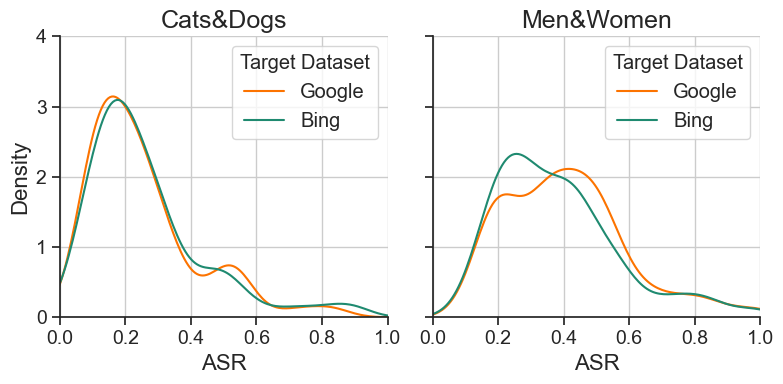

In [8]:
COLORS = ["#FC7300", "#1F8A70"]

# Load Data
df_case = df[(df['Dataset'] == 'catDog') | (df['Dataset'] == 'manWoman')]
df_case = df_case[df_case['isDatasetShared'] == False]
df_case = df_case[df_case['source_balancing'] == '20/80']

# Parameters
sns.set(rc={"figure.figsize":(8, 5)})
sns.set_style("ticks",{'axes.grid' : True})

# Plot
g = sns.FacetGrid(df_case, col="Dataset", hue="target_dataset", palette=COLORS)
g.map(sns.kdeplot, "asr")

# Axes
axes = g.axes.flatten()
axes[0].set_title("Cats&Dogs",size=18)
axes[1].set_title("Men&Women",size=18)

# Ticks and labels
g.set(xlim=(0, 1),xticks=np.arange(0,1.2,0.2))
g.set(ylim=(0, 4),yticks=np.arange(0,5,1))
g.set_xlabels("ASR", fontsize=16)  
g.set_ylabels("Density", fontsize=16)  
# Change the font size for the x and y tick labels
for ax in g.axes.flat:
    ax.tick_params(labelsize=14)

plt.rcParams['legend.title_fontsize'] = 'large'
plt.rcParams['legend.fontsize'] = 'large'
for ax in g.axes.ravel():
    ax.legend(title='Target Dataset',loc='upper right')

# Fig size
g.fig.set_size_inches(8,4)

# Save
plt.tight_layout()
plt.savefig(RESULTS_PATH + "sourceImpact.pdf")